# RQ1

In [1]:
import  pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
from datetime import datetime

Matplotlib is building the font cache; this may take a moment.


Import the necessary packages for data analysis

In [2]:
data = pd.read_csv('instagram_profiles.csv', sep='\t')
data.head()

,sid,profile_id,profile_name,firstname_lastname,description,following,followers,n_posts,url,cts,is_business_account
0,4184446,4.721050e+09,jphillip033,John Pierce,"""Document Everything Always""",250.0,146.0,170.0,NaN,2019-08-01 14:38:55.394 -0400,False
1,4184457,5.905830e+08,mama_haas,Deanna,Trying to enjoy the simple things in life. Kni...,534.0,1145.0,2878.0,www.etsy.com/shop/MamaHaas69,2019-08-01 14:39:36.526 -0400,False
2,4184460,1.074147e+09,yellowlightbreen,Eliza Gray,Maine is for Lovers,469.0,324.0,431.0,elizajanegray.com,2019-08-01 14:39:54.407 -0400,False
3,4184461,1.472039e+09,tec1025,Thomas Clark,NaN,NaN,NaN,NaN,NaN,2019-08-01 14:40:06.472 -0400,NaN
4,4184462,3.531421e+09,luckyfluff,NaN,NaN,NaN,NaN,NaN,NaN,2019-08-01 14:40:07.806 -0400,NaN


Import the data, view information for all columns in the data, and find missing values

In [27]:
data.describe()

,sid,profile_id,following,followers,n_posts
count,4.509586e+06,4.477139e+06,3.452771e+06,3.452771e+06,3.452771e+06
mean,2.255992e+06,3.083302e+09,1.405641e+03,4.739899e+03,4.095414e+02
std,1.301807e+06,4.266575e+10,8.113473e+03,1.939087e+05,1.041940e+03
min,1.186000e+03,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.128596e+06,2.735177e+08,3.560000e+02,1.590000e+02,2.200000e+01
50%,2.255992e+06,1.649248e+09,7.540000e+02,4.060000e+02,1.200000e+02
75%,3.383389e+06,5.514691e+09,1.573000e+03,9.740000e+02,4.200000e+02
max,4.510785e+06,9.001013e+13,4.191080e+06,2.854576e+08,1.837300e+05


Numerical data information is relatively stable

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4509586 entries, 0 to 4509585
Data columns (total 11 columns):
 #   Column               Dtype  
---  ------               -----  
 0   sid                  int64  
 1   profile_id           float64
 2   profile_name         object 
 3   firstname_lastname   object 
 4   description          object 
 5   following            float64
 6   followers            float64
 7   n_posts              float64
 8   url                  object 
 9   cts                  object 
 10  is_business_account  object 
dtypes: float64(4), int64(1), object(6)
memory usage: 378.5+ MB


The data has a total of 11 columns 378.5M

In [29]:
data.isnull().sum()

sid                          0
profile_id               32447
profile_name                 0
firstname_lastname      288465
description            2055996
following              1056815
followers              1056815
n_posts                1056815
url                    3639312
cts                     438488
is_business_account    1064263
dtype: int64

There are many missing values in the data

data=data.dropna()
data.isnull().sum()

Remove missing values

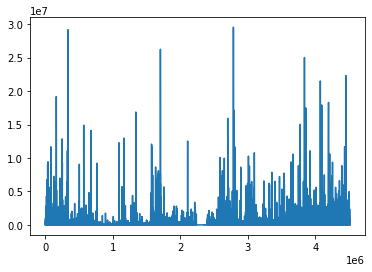

In [31]:
plt.plot(data['followers'])

Visual analysis of follwers

In [32]:
data['sid']

1          4184457
2          4184460
6          4184471
13         4184486
50         4184480
            ...   
4509561    3948501
4509562     841982
4509568    4184427
4509569    4184431
4509572    4184440
Name: sid, Length: 746064, dtype: int64

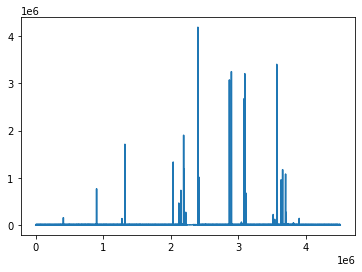

In [34]:
plt.plot(data['following'])

Visual analysis of follOWING

# RQ2

# RQ3

In [10]:
posts_cts = pd.read_csv('~/instagram_posts.csv', delimiter='\t', usecols=['cts'])
posts_cts = posts_cts.dropna()

In [11]:
posts_cts.cts = pd.to_datetime(posts_cts.cts)
posts_cts['time'] = posts_cts.cts.dt.strftime('%H:%M:%S')

In [12]:
dic = {}
for t in posts_cts['time']:
    if t in dic:
        dic[t]+=1
    else:
        dic[t]=1

In [13]:
most_common_time = sorted(dic.items(), key=lambda item: item[1], reverse = True)
#What is the most common time in which users publish their post
print('The most common time in which users publish their posts is ' + str(most_common_time[0][0]))

The most common time in which users publish their posts is 21:00:09


In [14]:
#Create a function that receives a time intervals list as a parameter and returns a plot with the number of posts for each given interval.
def n_posts_for_interval(lis):
    n = len(lis)
    labels = []
    counts = np.zeros(n)
    for i in range(n):
        labels.append(lis[i][0]+'-'+ lis[i][1])
        for t in posts_cts['time']:
            start, end = lis[i]
            if start <= t <= end:
                counts[i] +=1               
      
    
    plt.figure(figsize=(15,5))
    x = range(n)
    plt.xticks(x, labels, rotation=50)
    plt.bar(x, counts, width = 0.4)
    plt.xlabel('Time intervals')
    plt.ylabel('Number of posts')
    plt.title('Number of posts for each interval')
    plt.show()
    return 

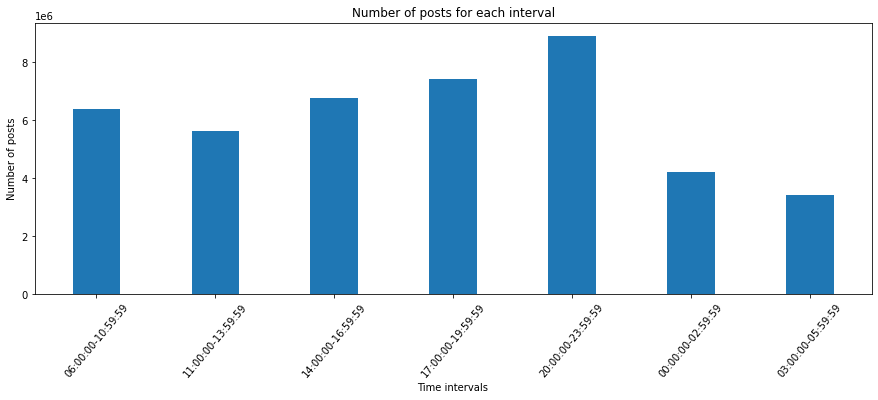

In [15]:
#Use the function that you created in the previous literal to plot the number of posts between the following time intervals
time_intervals = [('06:00:00','10:59:59'),('11:00:00','13:59:59'), ('14:00:00','16:59:59'), ('17:00:00','19:59:59'),
         ('20:00:00', '23:59:59'),('00:00:00', '02:59:59'), ('03:00:00','05:59:59')]
n_posts_for_interval(time_intervals)

# RQ4

In [10]:
def name(id):
    return data1.loc[data1['profile_id'] == id]
def num(n):
    data.sort_values(by='n_posts', inplace=True, ascending=False)
    for i in range(n):
        id=data['profile_id'][i]
        print(name(id))


In [11]:
num(10)

               sid  sid_profile      post_id    profile_id  location_id  \
13627713  40980438      4184446  B0nvWXnFBEx  4.721050e+09  272186955.0   
13627714  40980439      4184446  B0lHr6HF_od  4.721050e+09  216160420.0   
13627715  40980441      4184446  Bz5fUlwl6N1  4.721050e+09  240600923.0   
13627716  40980444      4184446  Bzo0MlIFhA6  4.721050e+09  216733399.0   
13627717  40980447      4184446  By5EP57lVmw  4.721050e+09  216160420.0   
13627718  40980450      4184446  BywSyM8lvhd  4.721050e+09  215245199.0   
13627719  40980453      4184446  ByuzQLWllNU  4.721050e+09          NaN   
13627720  40980456      4184446  Byh2ZdZlMcl  4.721050e+09    2726513.0   
13627721  40980459      4184446  ByWpTQ_FBtb  4.721050e+09  567389653.0   
13627722  40980460      4184446  ByWeIyqlcbw  4.721050e+09  272186955.0   
13627723  40980461      4184446  ByG4lJsFaX3  4.721050e+09  216119667.0   
13627724  40980462      4184446  Bx8u8qJFuMq  4.721050e+09  389983831.0   
28067214  12501312      4

The top 10 personal information with the most posts is:

In [92]:
data.sort_values(by='n_posts', inplace=True, ascending=False)
data

,sid,profile_id,profile_name,firstname_lastname,description,following,followers,n_posts,url,cts,is_business_account
3990313,3661552,1.996648e+08,jasem33312,jasem33312,NaN,2.0,82049.0,183730.0,NaN,2022-10-17 19:14:19,False
2571453,3288809,8.563367e+09,koenigpic,Helperwait Studio,Веб сайты от идеи до запуска,4538.0,675.0,142428.0,vk.com/ru.helperwait,2022-10-17 00:14:06,True
4338921,3970193,1.273455e+09,rudyanto62,Rudyanto 王耀祝,NaN,164.0,1693.0,126340.0,NaN,2022-10-17 10:00:51,False
3942129,3621669,9.813508e+06,hometown_ni,AngelsCowboysLakers,All about live & let live. Peace & Harmony. La...,7488.0,1755.0,125220.0,NaN,2022-10-17 02:49:38,False
4219642,3851869,1.607309e+09,dwfitfiber_thailand,เห็นผลตั้งแต่เซ็ตแรกท้าลอง,✿รับตัวแทนรายได้ดีมาก\n🏧 KTB l SCB l KBANK | B...,7490.0,44951.0,117262.0,bit.ly/2GdIYJl,2022-10-17 02:10:07,True
...,...,...,...,...,...,...,...,...,...,...,...
4509575,4184448,2.438073e+08,not_omeed,أوميد,NaN,NaN,NaN,NaN,NaN,2022-10-17 14:39:06,NaN
4509577,4184452,6.567796e+08,shak._n5,Shakil Hussain,NaN,NaN,NaN,NaN,NaN,2022-10-17 14:39:23,NaN
4509582,4184469,1.340704e+07,jornvlaeminck,Jorn Vlaeminck,NaN,NaN,NaN,NaN,NaN,2022-10-17 14:40:41,NaN
4509583,4184470,6.007354e+09,s_degol,Sanne Degol,NaN,NaN,NaN,NaN,NaN,2022-10-17 14:40:42,NaN


In [149]:
from numpy import *
s=data['profile_id']
lik=[]
com=[]
for i in range(10):
    da=data1.loc[data1['profile_id'] == s[i]]
    lik.append(sum(da['numbr_likes']))
    com.append(sum(da['number_comments']))
print(mean(lik))
print(mean(com))


338.6
9.1


The average number of likes is 715.5 and the average number of comments is 17.5

In [118]:
z=data[0:10]
def time_m(time):
    y=[]
    for i in range(len(time)):
        y.append(sum(z.set_index("cts").between_time("{}".format(time[i][0]), "{}".format(time[i][1]))['n_posts']))
    num_list = y
    x= range(len(time))
    plt.bar(x, num_list)
    plt.show()

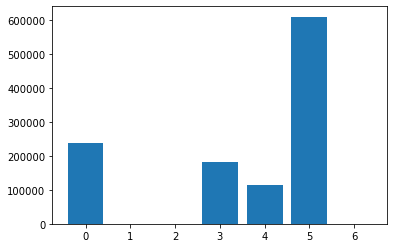

In [119]:
time_m([['06:00:00','10:59:59'],['11:00:00','13:59:59'],['14:00:00','16:59:59'],
['17:00:00','19:59:59'],['20:00:00','23:59:59'],['00:00:00','02:59:59'],['03:00:00','05:59:59']])

The number of posts in the top ten during this time is:

In [147]:

post=data[0:10]
post=post.reset_index()
post

,index,sid,profile_id,profile_name,firstname_lastname,description,following,followers,n_posts,url,cts,is_business_account
0,3990313,3661552,1.996648e+08,jasem33312,jasem33312,NaN,2.0,82049.0,183730.0,NaN,2022-10-17 19:14:19,False
1,2571453,3288809,8.563367e+09,koenigpic,Helperwait Studio,Веб сайты от идеи до запуска,4538.0,675.0,142428.0,vk.com/ru.helperwait,2022-10-17 00:14:06,True
2,4338921,3970193,1.273455e+09,rudyanto62,Rudyanto 王耀祝,NaN,164.0,1693.0,126340.0,NaN,2022-10-17 10:00:51,False
3,3942129,3621669,9.813508e+06,hometown_ni,AngelsCowboysLakers,All about live & let live. Peace & Harmony. La...,7488.0,1755.0,125220.0,NaN,2022-10-17 02:49:38,False
4,4219642,3851869,1.607309e+09,dwfitfiber_thailand,เห็นผลตั้งแต่เซ็ตแรกท้าลอง,✿รับตัวแทนรายได้ดีมาก\n🏧 KTB l SCB l KBANK | B...,7490.0,44951.0,117262.0,bit.ly/2GdIYJl,2022-10-17 02:10:07,True
5,2207897,345591,1.087614e+09,waxking911,Frank Hernandez,NaN,134.0,138.0,117099.0,NaN,NaT,False
6,4313908,3944512,1.603890e+09,gamt_official,Official IG Of GAMT Thailand,❥ แว่น gamt พร้อมส่งของแท้💯 มีโปร1290 พร้อมซอง...,7470.0,36001.0,113780.0,bit.ly/2GdIYJl,2022-10-17 21:10:30,True
7,4219476,3851808,2.181730e+08,collarosedw_official,grapeseed+collarose,🍇 สินค้าแบรนด์ dwplus\n💓 collarose+grapeseed+f...,7496.0,18021.0,113182.0,bit.ly/2asesw7,2022-10-17 02:08:17,True
8,4236057,3868432,2.855497e+08,gamt_authentic,Official IG Of GAMT Thailand,❥ แว่น gamt พร้อมส่ง มีโปร1290 พร้อมซองแว่น+ผ้...,7480.0,27511.0,112777.0,bit.ly/2T2RIqG,2022-10-17 09:28:30,True
9,1631526,1312725,8.312603e+09,ivankkkka.trmp,IVANKA DARCEY K. TRUMP,DORA. 👄 #Mango,7497.0,2.0,112723.0,www.flightclub.com/yeezy,2022-10-17 02:41:26,False


The main comment time is spread between twelve and three in the morning, and at night people may be more willing to like posts

# RQ5

183730.0
142428.0
126340.0
125220.0
117262.0
117099.0
113780.0
113182.0
112777.0
112723.0
[183730.0, 142428.0, 126340.0, 125220.0, 117262.0, 117099.0, 113780.0, 113182.0, 112777.0, 112723.0]


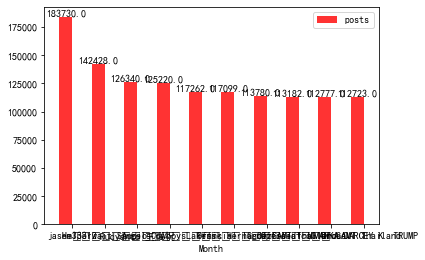

In [149]:

plt.rcParams['font.sans-serif']=['SimHei'] 
plt.rcParams['axes.unicode_minus']=False
n=[]
num=[]
for i in range(10):
       num_list = post['n_posts'][i]
       num.append(num_list)
       x= post['firstname_lastname'][i]
       n.append(x)
x=range(len(num))
rects1 = plt.bar(x, height=num, width=0.4, alpha=0.8, color='red', label="posts")
plt.xticks([index + 0.2 for index in x], n)
plt.xlabel("Month")

plt.title("")
plt.legend()  
for rect in rects1:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height, str(height), ha="center", va="bottom")
plt.show()

Top 10 with the most posts

In [35]:
data.sort_values(by='followers', inplace=True, ascending=False)
flo=data[0:10]
flo=flo.reset_index()
flo

,index,sid,profile_id,profile_name,firstname_lastname,description,following,followers,n_posts,url,cts,is_business_account
0,2880218,336492,2.502532e+07,instagram,Instagram,Bringing you closer to the people and things y...,226.0,285457645.0,5760.0,help.instagram.com,NaN,False
1,2582507,371414,3.416684e+06,victoriassecret,Victoria's Secret,Confidence is sexy. #wearitdaily,549.0,65269440.0,7355.0,like2b.uy/victoriassecret,NaN,True
2,3820939,337097,2.082449e+07,nba,NBA,"30 teams, 1 🏆\n👟: @nbakicks \n📽: @nbahistory \...",817.0,35339708.0,28816.0,nba.app.link/js6X7SVaxT,NaN,True
3,701965,330376,1.876191e+08,louisvuitton,Louis Vuitton Official,The official Instagram account of Louis Vuitton.,5.0,30689316.0,3352.0,on.louisvuitton.com/Like2Buy,NaN,True
4,2414951,292359,2.125507e+09,buzzfeedtasty,Tasty,"Recipes that will make you say ""oh yes!""\n👇 Cl...",298.0,30246783.0,2791.0,tasty.co/linkinbio,NaN,True
5,2785241,3437294,4.968651e+08,andresiniesta8,Andres Iniesta,"Andres Iniesta Official Instagram Account, \nB...",151.0,29542143.0,990.0,mikakus.com,2019-05-08 23:54:35.377 -0400,False
6,333193,158690,2.341008e+07,hm,H&M,Welcome to #HM! Follow us at @HM_Man @HM_Kids ...,403.0,29176804.0,4566.0,hm.info/1c9he,2018-05-31 19:33:46.022 -0400,True
7,3934581,3615154,2.423993e+07,princessyahrini,Syahrini,NaN,835.0,29042823.0,4719.0,www.youtube.com/c/ThePrincesSyahrini,2019-06-26 15:05:53.411 -0400,True
8,1311970,508140,5.041706e+07,danbilzerian,Dan Bilzerian,Snapchat: dbilzerian,252.0,26476004.0,1311.0,www.ignite.co,NaN,True
9,1703764,3513205,9.070254e+08,akshaykumar,Akshay Kumar,#AkshayKumar,5.0,26252169.0,1173.0,bit.ly/AliAliBlank,2019-05-14 08:29:29.754 -0400,False


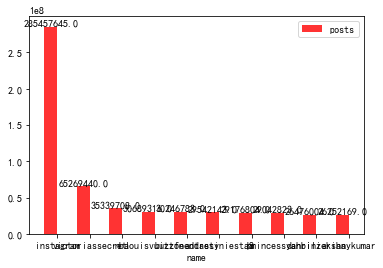

In [187]:

n=[]
num=[]
for i in range(10):
       num_list = flo['followers'][i]
       num.append(num_list)
       x= flo['profile_name'][i]
       n.append(x)
x=range(len(num))
rects1 = plt.bar(x, height=num, width=0.4, alpha=0.8, color='red', label="posts")
plt.xticks([index + 0.2 for index in x], n)
plt.xlabel("name")

plt.title("")
plt.legend()  
for rect in rects1:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height, str(height), ha="center", va="bottom")
plt.show()

Top 10 with the most follwers

So the most followed user is Instagram, which has 285457645.0 followers

In [56]:
data2= pd.read_csv('instagram_locations.csv', sep='\t')


In [125]:
flo['profile_id'][0]
area=[]
loca=[]
lo=data1[data1['profile_id']==flo['profile_id'][0]]
for i in range(len(lo)):
    location=data2[data2['id']==lo['location_id'][i]]
    area.append(location[['dir_country_name']].values[0])  
    loca.append(location[['dir_city_name']].values[0])

print(area)
print(loca)



[array(['United States'], dtype=object), array([nan], dtype=object), array(['Peru'], dtype=object), array([nan], dtype=object), array([nan], dtype=object), array(['United Kingdom'], dtype=object), array([nan], dtype=object), array(['Spain'], dtype=object), array([nan], dtype=object), array([nan], dtype=object), array([nan], dtype=object), array([nan], dtype=object), array([nan], dtype=object), array(['United Kingdom'], dtype=object), array(['China'], dtype=object), array([nan], dtype=object), array([nan], dtype=object), array([nan], dtype=object), array(['United Kingdom'], dtype=object), array(['Netherlands'], dtype=object), array([nan], dtype=object), array(['Thailand'], dtype=object), array([nan], dtype=object), array([nan], dtype=object), array(['United States'], dtype=object), array([nan], dtype=object), array(['Japan'], dtype=object), array([nan], dtype=object), array(['Australia'], dtype=object), array([nan], dtype=object), array([nan], dtype=object), array([nan], dtype=object), 

It can be seen that the most common region is the United Kingdom

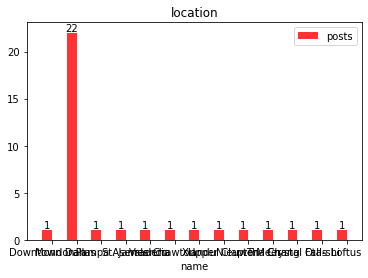

In [133]:
loc1=[]
for i in range(len(loca)):
    loc1.append(loca[i].astype(str).item())

dict = {}
for key in loc1:
    dict[key] = dict.get(key, 0) + 1
key1=[]
value1=[]
for key in dict.keys():
    key1.append(key)
    
for value in dict.values():
    value1.append(value)
x=range(len(key1))
rects1 = plt.bar(key1, height=value1, width=0.4, alpha=0.8, color='red', label="posts")
plt.xticks([index + 0.2 for index in x],key1)
plt.xlabel("name")
plt.title("location")
plt.legend()  
for rect in rects1:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height, str(height), ha="center", va="bottom")
plt.show()


It can be seen that there are 22 posts without cities, and the other cities appear once

In [110]:
data2

,sid,id,name,street,zip,city,region,cd,phone,aj_exact_city_match,...,dir_city_name,dir_city_slug,dir_country_id,dir_country_name,lat,lng,primary_alias_on_fb,slug,website,cts
0,719981,110296492939207,"Playa de Daimuz - Valencia, España",NaN,NaN,NaN,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,-0.139475,38.974391,daimuzplaya,playa-de-daimuz-valencia-espana,https://es.wikipedia.org/wiki/Daimuz,2019-05-29 01:21:29.987
1,719983,274391278,Nová Vieska,NaN,NaN,Nová Vieska,NaN,SK,NaN,True,...,Kis-Újfalu,kis-ujfalu,SK,Slovakia,18.466667,47.866667,NaN,nova-vieska,NaN,2019-05-29 01:21:38.037
2,719985,148885595789195,Everest Today,Himalayas,+977,"Kathmandu, Nepal",NaN,NP,NaN,False,...,Pasupati,pasupati,NP,Nepal,85.330150,27.701960,EverestToday,everest-today,NaN,2019-05-29 01:21:46.295
3,719987,263258277,BULAC - Bibliothèque universitaire des langues...,"65, rue des Grands-Moulins",75013,"Paris, France",NaN,FR,01 81 69 18 00,False,...,13ème Arrondissement Paris,13eme-arrondissement-paris,FR,France,2.375995,48.827240,BULAC.Paris,bulac-bibliotheque-universitaire-des-langues-e...,www.bulac.fr,2019-05-29 01:21:54.355
4,326443,406147529857708,ABC Cable Networks Group,3800 W Alameda Ave,91505,"Burbank, California",NaN,US,(818) 569-7500,False,...,NaN,NaN,NaN,NaN,-118.341864,34.153265,NaN,abc-cable-networks-group,NaN,2019-04-02 15:22:55.703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1022653,719973,873926439475785,Baby Season,Suarez de Figueroa # 380,NaN,"Santa Cruz de la Sierra, Bolivia",NaN,BO,69118383,False,...,Santa Cruz de la Sierra,santa-cruz-de-la-sierra,BO,Bolivia,-63.185307,-17.786130,babyseason.srl,baby-season,NaN,2019-05-29 01:20:57.078
1022654,719975,390707529,Cueva Carvajal,NaN,NaN,NaN,NaN,NaN,+52 81 2089 7776,NaN,...,NaN,NaN,NaN,NaN,-100.359619,25.653550,CuevaCarvajalBrewPub,cueva-carvajal,http://www.cuevacarvajal.mx,2019-05-29 01:21:04.434
1022655,719977,1205466612894741,The Cheesecake Factory,304 Orland Square Dr,60462,"Orland Park, Illinois",NaN,US,(708) 873-3747,False,...,Manor Homes,manor-homes,US,United States,-87.843649,41.618551,NaN,the-cheesecake-factory,http://locations.thecheesecakefactory.com/il/o...,2019-05-29 01:21:13.404
1022656,719979,286794844,Plimmer Towers,2 Gilmer Terrace,NaN,"Wellington, New Zealand",NaN,NZ,NaN,False,...,NaN,NaN,NaN,NaN,174.775000,-41.285800,NaN,plimmer-towers,NaN,2019-05-29 01:21:21.628


In [46]:

flo['profile_id'][0]
no=data1[data1['profile_id']==flo['profile_id'][0]]
no=no.reset_index()
a=0
b=0
c=0

for i in range(len(no)):
    if no['post_type'][i]==1:
        a=a+1
    if no['post_type'][i]==2:
        b=b+1
    if no['post_type'][i]==3:
        c=c+1


Image

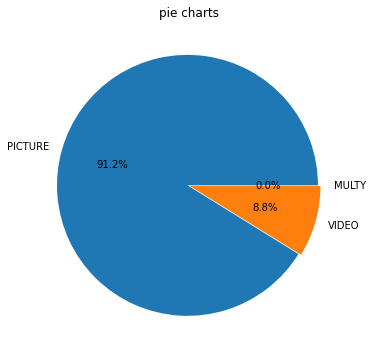

In [47]:
plt.figure(figsize=(6,6))
label=['PICTURE','VIDEO','MULTY']
explode=[0.01,0.01,0.01]
values=[a,b,c]
plt.pie(values,explode=explode,labels=label,autopct='%1.1f%%')#绘制饼图
plt.title('pie charts')
plt.show()


It can be seen that the proportion of pure pictures occupies 91.2%, indicating that  people like to post pictures, and there are neither of them

In [53]:
from numpy import *
like1=[]
like2=[]
like3=[]
comment1=[]
comment2=[]
comment3=[]
for i in range(len(no)):
    if no['post_type'][i]==1:
        like1.append(no['numbr_likes'][i])
        comment1.append(no['number_comments'][i])
    if no['post_type'][i]==2:
        like2.append(no['numbr_likes'][i])
        comment2.append(no['number_comments'][i])
    if no['post_type'][i]==3:
        ike3.append(no['numbr_likes'][i])
        comment3.append(no['number_comments'][i])
like1=mean(like1)
like2=mean(like2)
like3=mean(like3)
comment1=mean(comment1)
comment2=mean(comment2)
comment3=mean(comment3)
print(like1,like2,like3,comment1,comment2,comment3)
print(flo['followers'][0])

905933.4516129033 593409.6666666666 nan 6703.290322580645 5749.333333333333 nan
285457645.0


D:\anaconda\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
D:\anaconda\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


His 285457645 followers, with less than three-thousandths of the likes on each post, indicate that the fans may not be genuine

Images with an average of 905933 likes and 6703 comments, while videos have an average of 593409 likes and 5749 comments, you can see that images are more clickable

# RQ6

In [26]:
#I join the dataframes of interest and remove missing values through command df.dropna()
profiles = pd.read_csv('~/instagram_profiles.csv', delimiter='\t', usecols = ['profile_id','profile_name','following','followers'])
profiles = profiles.dropna()
posts = pd.read_csv('~/instagram_posts.csv', delimiter='\t', usecols=['profile_id','cts'])
posts = posts.dropna()
joined_df = pd.merge(profiles,posts)
joined_df = joined_df.dropna()

In [7]:
def average_time_between_posts(posts_time):
    #I create a dictionary, dic_of_times, having the subjects as keys and the cts of the subject's posts as values
    dic_of_times = {} 
    for l in posts_time:
        subj,time = l[0],l[1]
        if subj in dic_of_times:
            dic_of_times[subj].append(time)
        else:
            dic_of_times[subj] = [time]
            
    #I create another dictionary, dic_of_averages, having the subjects as keys 
    #and the average time (in seconds) a user lets pass before publishing another post as values
    dic_of_averages = {}
    for subj,times in dic_of_times.items():
        l= []
        times = sorted(times,reverse=True)
        if len(times) > 1:
            for i in range(len(times)-1):
                diff = times[i] - times[i+1]
                duration_in_s = diff.total_seconds()
                l.append(duration_in_s)
            dic_of_averages[subj] = np.average(l)
            
    #The total aravage is equal to the average of the values of the dictionary
    list_of_averages = list(map(int,dic_of_averages.values()))
    total_average = np.average(list_of_averages)

    return dic_of_averages,total_average

In [28]:
#I convert the values of 'cts' column to a pandas datetime object through command pd.to_datetime()
joined_df.cts = pd.to_datetime(joined_df.cts)

#I convert the dataframe with columns 'profile_id' and 'cts to a numpy array through command df.to_numpy()
posts_time = joined_df[['profile_name','cts']].to_numpy() 
     
dic_of_averages, total_average = average_time_between_posts(posts_time)
days = int(total_average/86400) #total average in days
minutes= int(((total_average/86400)%1)*1440) #total average in minutes

#What is the average time (days and minutes) a user lets pass before publishing another post?
print('The average time (in days) a user lets pass before publishing another post is: ' + str(days))
print('The average time (in minutes) a user lets pass before publishing another post is: ' + str(minutes))

The average time (in days) a user lets pass before publishing another post is: 24
The average time (in minutes) a user lets pass before publishing another post is: 624


In [29]:
sorted_averages =sorted(dic_of_averages.items(), key=lambda item: item[1]) #sorted averages
#top 3 users profile_name
print(sorted_averages[0])
print(sorted_averages[1])
print(sorted_averages[2])

('radilyubenmorris', 0.0)
('bodied_by_vinny', 0.0)
('whoareyou10111', 0.0)


Text(0, 0.5, 'Number of followers')

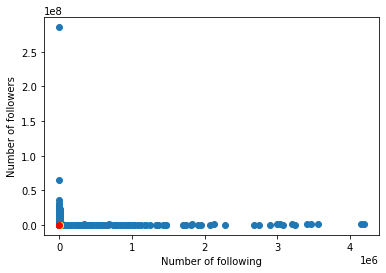

In [30]:
#Plot the top 3 users that publish posts more frequently (calculate the average time that passes between posts), 
#including their amount of followers and following. 
#Provide insights from that chart.

top1 = profiles[profiles['profile_name'] == sorted_averages[0][0]]
top2 = profiles[profiles['profile_name'] == sorted_averages[1][0]]
top3 = profiles[profiles['profile_name'] == sorted_averages[2][0]]

plt.scatter(x = profiles['following'], y =profiles['followers'])
plt.scatter(x = top1['following'], y = top1['followers'], c = 'green')
plt.scatter(x = top2['following'], y = top2['followers'], c = 'yellow')
plt.scatter(x = top3['following'], y = top3['followers'], c = 'red')

plt.xlabel('Number of following')
plt.ylabel('Number of followers')

#Conclusion: there is no correlation between average time between posts and number of following/followers of a profile

In [2]:
posts_likes_comments = pd.read_csv('~/instagram_posts.csv', delimiter='\t', usecols=['cts','numbr_likes','number_comments'])
posts_likes_comments = posts_likes_comments.dropna()
posts_likes_comments.cts = pd.to_datetime(posts_likes_comments.cts)
posts_likes_comments['time'] = posts_likes_comments.cts.dt.strftime('%H:%M:%S')

In [3]:
posts_likes = posts_likes_comments[['time','numbr_likes']].to_numpy()
posts_comments = posts_likes_comments[['time', 'number_comments']].to_numpy()

In [6]:
def avg_for_time_interval(lis, posts):
    n = len(lis)    
    dic = {}
    for i in range(n):
        label = lis[i][0]+'-'+ lis[i][1]
        for l in posts:
            t,num = l[0],l[1]
            start, end = lis[i]
            if start <= t <= end:
                if label in dic:
                    dic[label].append(num) 
                else:
                    dic[label] = [num]
                    
        
    dic_of_averages = {}
    for label,values in dic.items():
        dic_of_averages[label] = np.average(values)
      
    return dic_of_averages

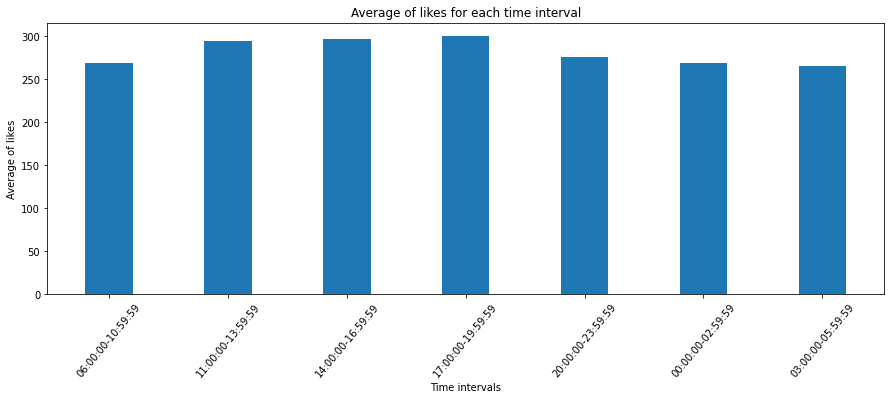

In [8]:
#Plot the time intervals with the highest average number of “likes” 
time_intervals = [('06:00:00','10:59:59'),('11:00:00','13:59:59'), ('14:00:00','16:59:59'), ('17:00:00','19:59:59'),
         ('20:00:00', '23:59:59'),('00:00:00', '02:59:59'), ('03:00:00','05:59:59')]
dic_of_averages = avg_for_time_interval(time_intervals, posts_likes)

plt.figure(figsize=(15,5))
x = range(len(time_intervals))
plt.xticks(x, dic_of_averages.keys(), rotation=50)
plt.bar(x, dic_of_averages.values(), width = 0.4)
plt.xlabel('Time intervals')
plt.ylabel('Average of likes')
plt.title('Average of likes for each time interval')
plt.show()

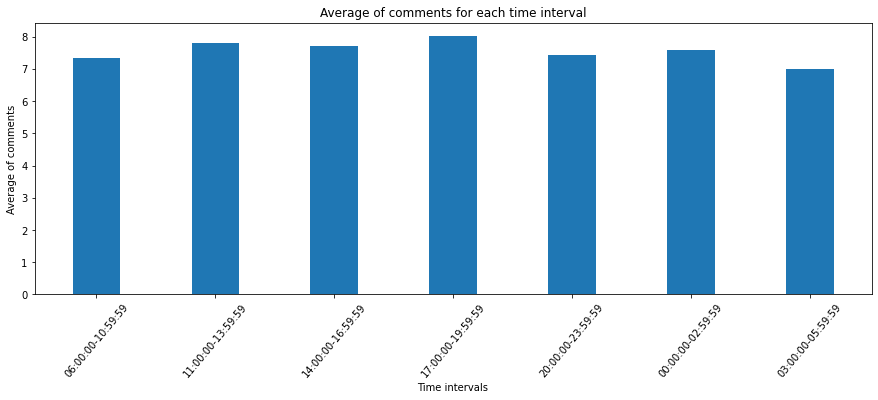

In [9]:
#Plot the time intervals with the highest average number of comments on posts.
dic_of_averages = avg_for_time_interval(time_intervals, posts_comments)

plt.figure(figsize=(15,5))
x = range(len(time_intervals))
plt.xticks(x, dic_of_averages.keys(), rotation=50)
plt.bar(x, dic_of_averages.values(), width = 0.4)
plt.xlabel('Time intervals')
plt.ylabel('Average of comments')
plt.title('Average of comments for each time interval')
plt.show()

# RQ7

# RQ8